In [5]:
import numpy as np
import pandas as pd

In [6]:
pd.read_csv('https://cocl.us/datascience_survey_data', index_col = 0)

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


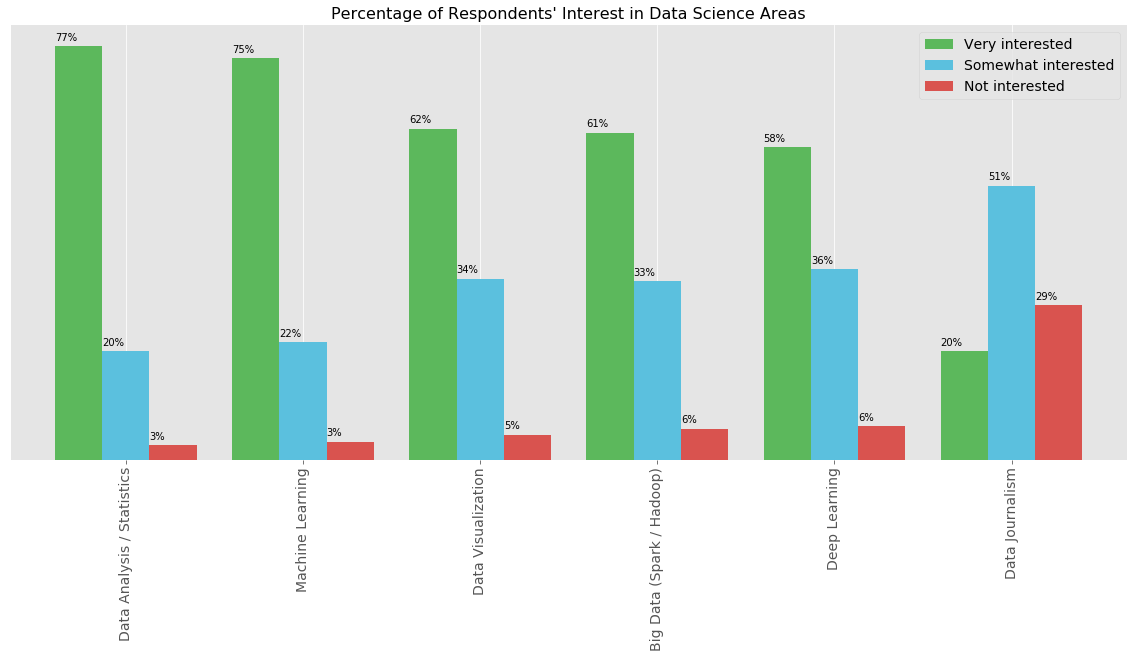

In [3]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches

mpl.style.use('ggplot') # optional: for ggplot-like style

df_surv = pd.read_csv('https://cocl.us/datascience_survey_data',index_col = 0)
df_surv.sort_values(by='Very interested', ascending=False, inplace=True)

# Change this line to plot percentages instead of absolute values
ax = (df_surv.div(df_surv.sum(1), axis=0)).plot(kind='bar', figsize=(20, 8), width = 0.8, color = ['#5cb85c','#5bc0de','#d9534f'])
plt.legend(labels=df_surv.columns,fontsize= 14)
plt.title("Percentage of Respondents' Interest in Data Science Areas",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))

plt.show()


In [4]:
import numpy as np  
import pandas as pd 

!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2019.10  |           py36_0           5 KB
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         184 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    conda-4.8.3                |   py36h9f0ad1d_1         3.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    fsspec-0.7.3               |             py_0          51 KB  conda-forge
    json5-0.9.0                |             py_0          24 KB  conda-forge
    liblie

WARNING conda.base.context:use_only_tar_bz2(632): Conda is constrained to only using the old .tar.bz2 file format because you have conda-build installed, and it is <3.18.3.  Update or remove conda-build to get smaller downloads and faster extractions.

EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




ModuleNotFoundError: No module named 'folium'

In [7]:
df_incidents = pd.read_csv('https://cocl.us/sanfran_crime_dataset', index_col=0,)
df_incidents.rename(columns={'PdDistrict':'Neighborhood'}, inplace=True)
df_incidents_1 = df_incidents.groupby(['Neighborhood']).size().reset_index(name='Count') 
df_incidents_1

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [8]:

# download countries geojson file
!wget --quiet https://cocl.us/sanfran_geojson -O world_countries.json

sanfran_geo = r'world_countries.json' # geojson file

# create a plain world map
sanfran_map = folium.Map(location=[37.77,-122.42], zoom_start=12)

# generate choropleth map
sanfran_map.choropleth(
    geo_data=sanfran_geo,
    data=df_incidents_1,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)

# display map
sanfran_map


'wget' is not recognized as an internal or external command,
operable program or batch file.


NameError: name 'folium' is not defined